
Problem Statement

A retail company ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
train_df=pd.read_csv(r'D:\Pgm\DataScience\Dataset\BlackFriday\train.csv')

In [50]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [51]:
test_df=pd.read_csv(r'D:\Pgm\DataScience\Dataset\BlackFriday\test.csv')

In [52]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [54]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [55]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [57]:
test_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [58]:
df=pd.concat([train_df,test_df])

In [59]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [61]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [62]:
# we have null values in product_category 2 and 3

In [63]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [64]:
# since it is categorical in nature we will replace null values with mode

In [65]:
df['Product_Category_2'].mode()[0]

8.0

In [66]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [67]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [68]:
# same for third category

In [69]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [70]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [71]:
# now no null values in data set

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [73]:
# now changing datatype for Stay_In_Current_City_Years  as int

In [74]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [75]:
# so we have to remove + suffix to 4

In [76]:
df['Stay_In_Current_City_Years']=[i.strip('+') for i in df['Stay_In_Current_City_Years']]

In [77]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int')

In [78]:
df['Stay_In_Current_City_Years'].dtype

dtype('int32')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 74.7+ MB


In [80]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [81]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16,C,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4,1,8,8.0,16.0,NaN
233595,1006036,P00254642,F,26-35,15,B,4,1,5,8.0,16.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4,0,10,16.0,16.0,NaN


In [82]:
# we don't need product id or user id so we drop them

In [83]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [84]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4,1,8,8.0,16.0,NaN
233595,F,26-35,15,B,4,1,5,8.0,16.0,NaN
233596,F,26-35,15,B,4,1,1,5.0,12.0,NaN
233597,F,46-50,1,C,4,0,10,16.0,16.0,NaN


In [85]:
df.to_csv('cleaned_df.csv',index=False)

In [6]:
df = pd.read_csv('cleaned_df.csv')

In [87]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
783662,F,26-35,15,B,4,1,8,8.0,16.0,NaN
783663,F,26-35,15,B,4,1,5,8.0,16.0,NaN
783664,F,26-35,15,B,4,1,1,5.0,12.0,NaN
783665,F,46-50,1,C,4,0,10,16.0,16.0,NaN


In [ ]:
#EDA

In [ ]:
sns.countplot(data=df,x='Gender')

In [70]:
# so majority of peoples are male in dataset

In [72]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<Axes: xlabel='Gender', ylabel='Purchase'>

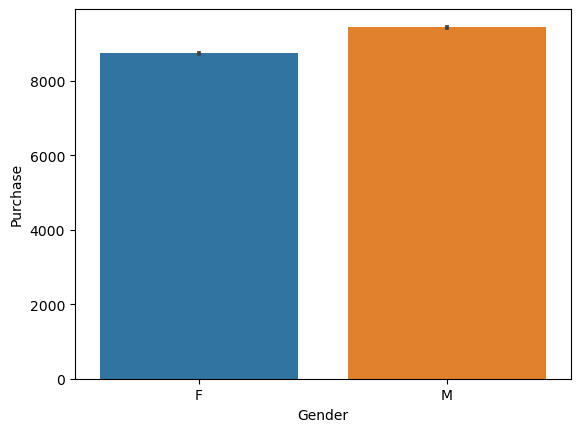

In [80]:
sns.barplot(data=df,x='Gender',y="Purchase")

<Axes: xlabel='Age', ylabel='Purchase'>

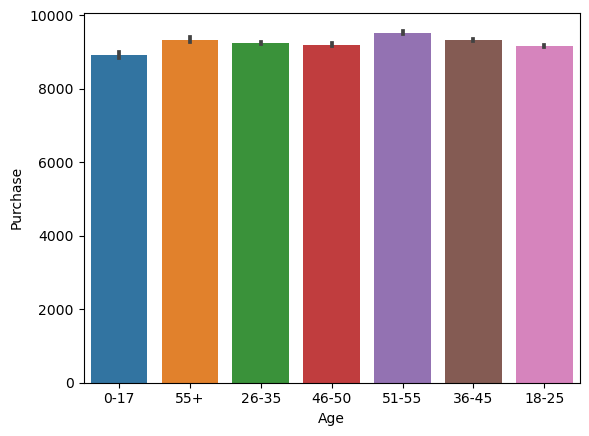

In [76]:
sns.barplot(data=df,x='Age',y='Purchase')

In [ ]:
# almost every age peoples is doing same amount of purchase

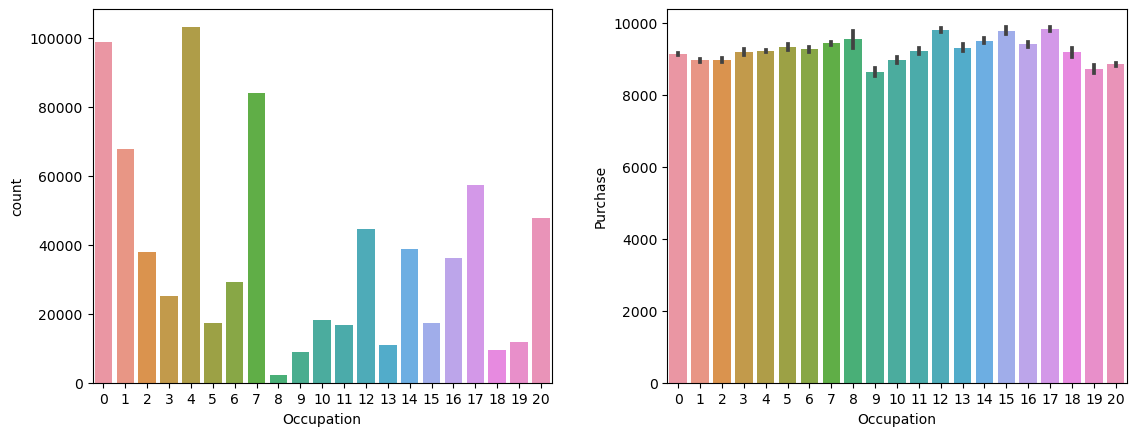

In [104]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Occupation')
plt.subplot(1,2,2)
sns.barplot(data=df,x='Occupation',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

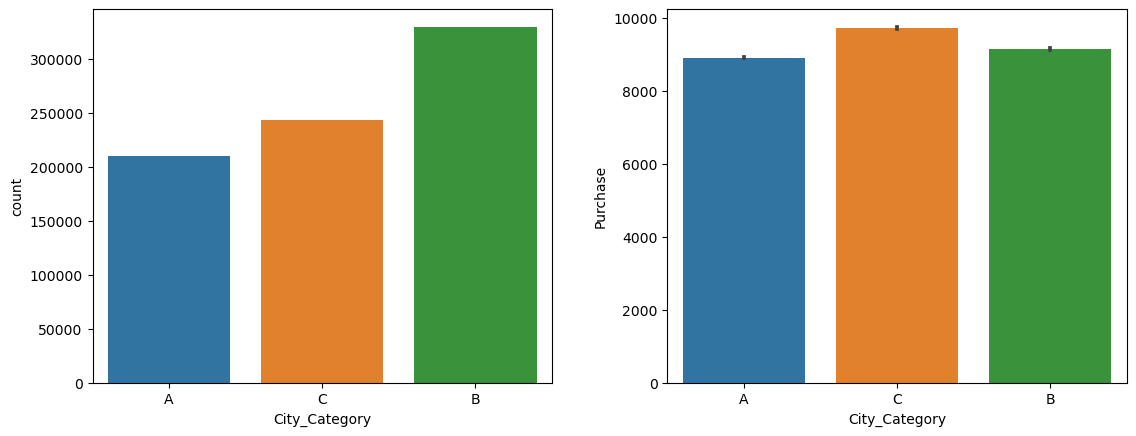

In [87]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='City_Category')
plt.subplot(1,2,2)
sns.barplot(data=df,x='City_Category',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

In [88]:
# most peoples in data set are belong to B category but C category peoples purhase is highest among A,B,C

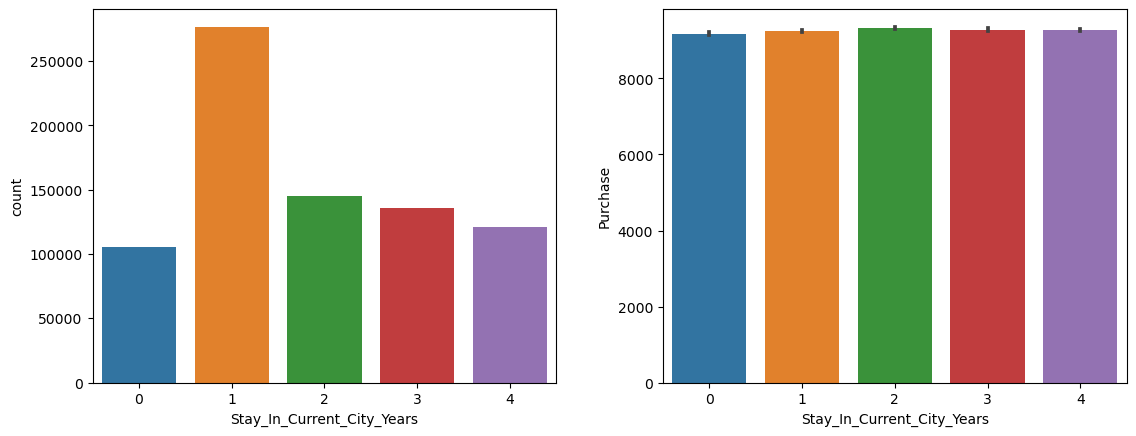

In [89]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Stay_In_Current_City_Years')
plt.subplot(1,2,2)
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

In [91]:
# most people living since a year in current city and all are doing same amout of purchase

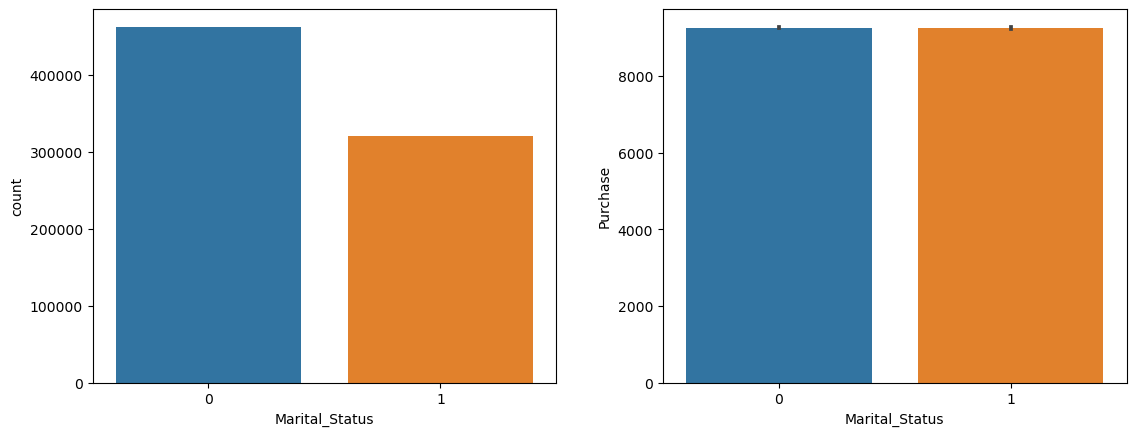

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Marital_Status')
plt.subplot(1,2,2)
sns.barplot(data=df,x='Marital_Status',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

In [96]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

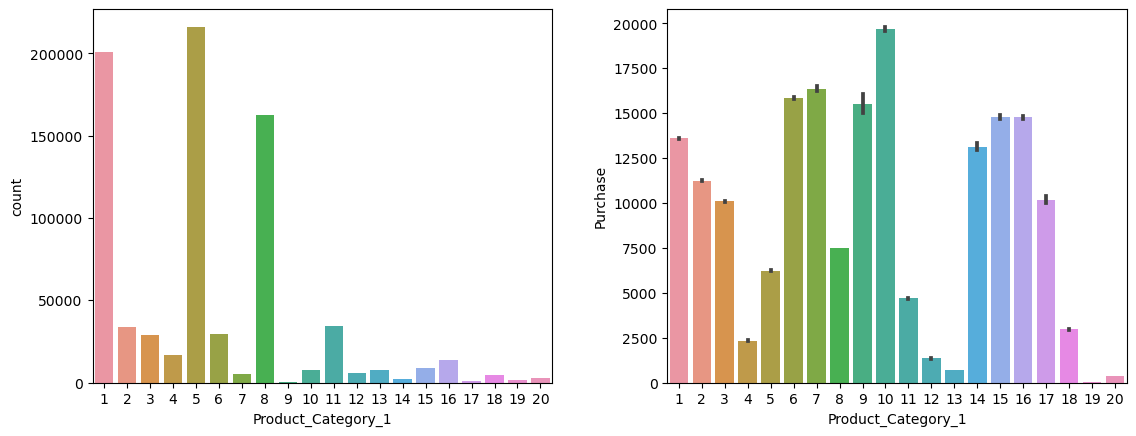

In [99]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Product_Category_1'])
plt.subplot(1,2,2)
sns.barplot(data=df,x='Product_Category_1',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

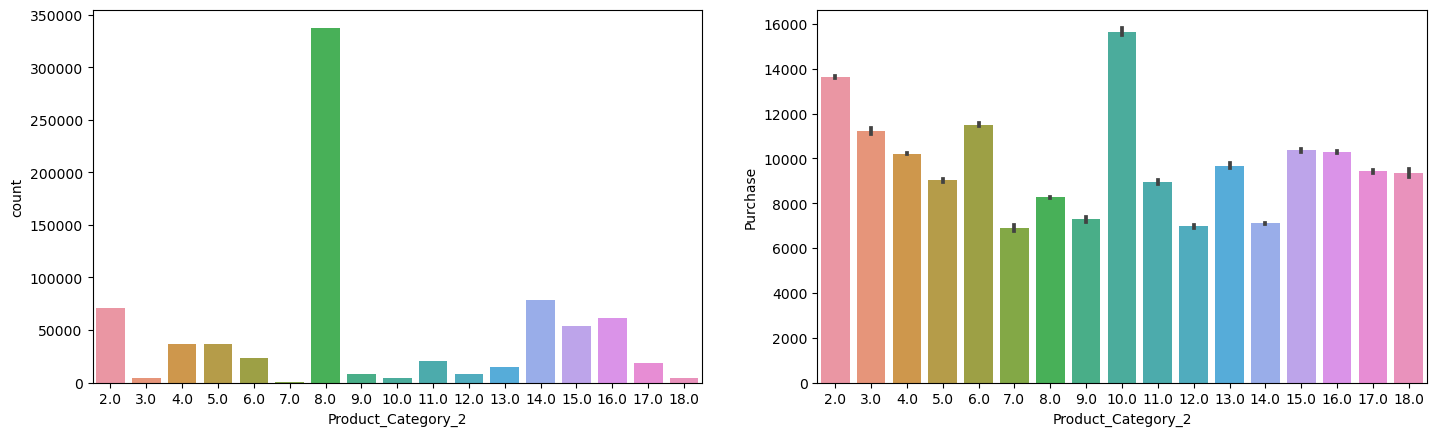

In [102]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Product_Category_2'])
plt.subplot(1,2,2)
sns.barplot(data=df,x='Product_Category_2',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

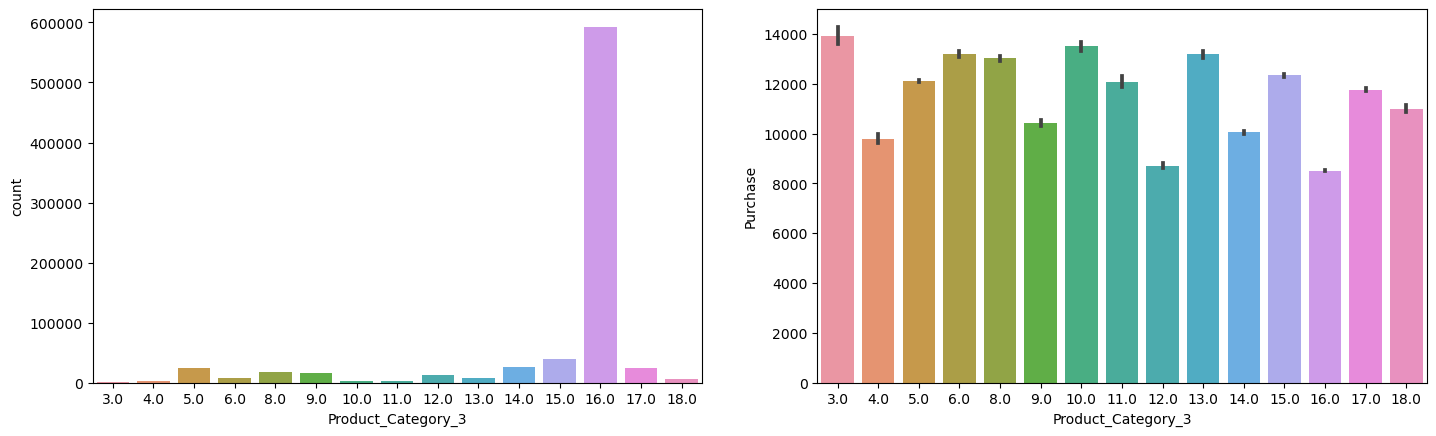

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Product_Category_3'])
plt.subplot(1,2,2)
sns.barplot(data=df,x='Product_Category_3',y='Purchase')
plt.tight_layout(pad=3)
plt.show()

<Axes: >

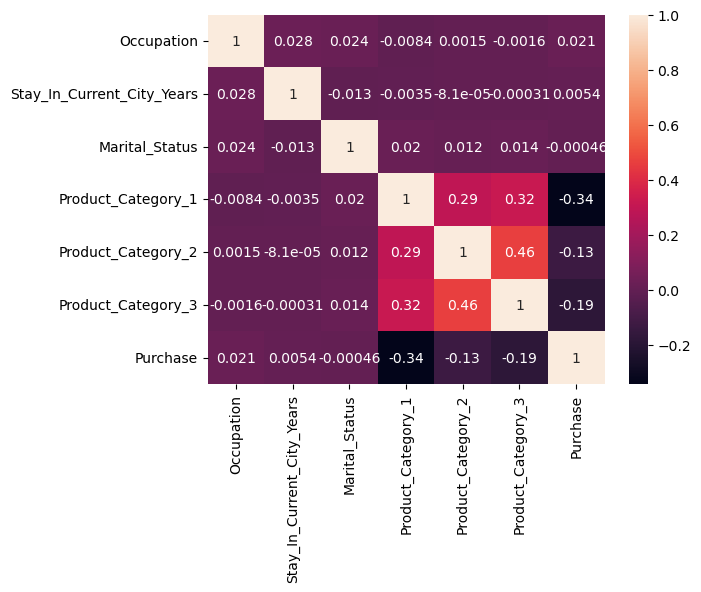

In [108]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [190]:
# no features are highly correlated

In [44]:
df1 = df.copy()

In [45]:
df1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4,0,8,8.0,16.0,7969.0


In [46]:
df1.drop(['Gender','Stay_In_Current_City_Years','Marital_Status','Occupation'],axis=1,inplace=True)

In [47]:
df1

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,A,3,8.0,16.0,8370.0
1,0-17,A,1,6.0,14.0,15200.0
2,0-17,A,12,8.0,16.0,1422.0
3,0-17,A,12,14.0,16.0,1057.0
4,55+,C,8,8.0,16.0,7969.0
...,...,...,...,...,...,...
783662,26-35,B,8,8.0,16.0,NaN
783663,26-35,B,5,8.0,16.0,NaN
783664,26-35,B,1,5.0,12.0,NaN
783665,46-50,C,10,16.0,16.0,NaN


In [48]:
test_df_new=df1[df1['Purchase'].isna()]

In [49]:
train_df_new=df1[~df1['Purchase'].isna()]

In [50]:
train_df_new

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,A,3,8.0,16.0,8370.0
1,0-17,A,1,6.0,14.0,15200.0
2,0-17,A,12,8.0,16.0,1422.0
3,0-17,A,12,14.0,16.0,1057.0
4,55+,C,8,8.0,16.0,7969.0
...,...,...,...,...,...,...
550063,51-55,B,20,8.0,16.0,368.0
550064,26-35,C,20,8.0,16.0,371.0
550065,26-35,B,20,8.0,16.0,137.0
550066,55+,C,20,8.0,16.0,365.0


In [51]:
test_df_new

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550068,46-50,B,1,11.0,16.0,NaN
550069,26-35,C,3,5.0,16.0,NaN
550070,36-45,B,5,14.0,16.0,NaN
550071,36-45,B,4,9.0,16.0,NaN
550072,26-35,C,4,5.0,12.0,NaN
...,...,...,...,...,...,...
783662,26-35,B,8,8.0,16.0,NaN
783663,26-35,B,5,8.0,16.0,NaN
783664,26-35,B,1,5.0,12.0,NaN
783665,46-50,C,10,16.0,16.0,NaN


In [52]:
test_df_new.drop('Purchase',axis=1,inplace=True)

In [53]:
test_df_new

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3
550068,46-50,B,1,11.0,16.0
550069,26-35,C,3,5.0,16.0
550070,36-45,B,5,14.0,16.0
550071,36-45,B,4,9.0,16.0
550072,26-35,C,4,5.0,12.0
...,...,...,...,...,...
783662,26-35,B,8,8.0,16.0
783663,26-35,B,5,8.0,16.0
783664,26-35,B,1,5.0,12.0
783665,46-50,C,10,16.0,16.0


In [54]:
train_df_new.head()

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,A,3,8.0,16.0,8370.0
1,0-17,A,1,6.0,14.0,15200.0
2,0-17,A,12,8.0,16.0,1422.0
3,0-17,A,12,14.0,16.0,1057.0
4,55+,C,8,8.0,16.0,7969.0


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le =LabelEncoder()

In [58]:
category_encoder= le.fit(train_df_new['City_Category'])
age_encoder = le.fit(train_df_new['Age'])

In [59]:
train_df_new['City_Category']=le.fit_transform(train_df_new['City_Category'])
train_df_new['Age']=le.fit_transform(train_df_new['Age'])

In [60]:
le.classes_

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [61]:
train_df_new

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,3,8.0,16.0,8370.0
1,0,0,1,6.0,14.0,15200.0
2,0,0,12,8.0,16.0,1422.0
3,0,0,12,14.0,16.0,1057.0
4,6,2,8,8.0,16.0,7969.0
...,...,...,...,...,...,...
550063,5,1,20,8.0,16.0,368.0
550064,2,2,20,8.0,16.0,371.0
550065,2,1,20,8.0,16.0,137.0
550066,6,2,20,8.0,16.0,365.0


In [62]:
X = train_df_new.drop('Purchase',axis=1)

In [63]:
y = train_df_new['Purchase']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(440054, 5)

In [67]:
X_test.shape

(110014, 5)

In [68]:
y_train.shape

(440054,)

In [69]:
y_test.shape

(110014,)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr =LinearRegression()

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred=lr.predict(X_test)

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [75]:
r2_score(y_test,y_pred)

0.1279374883173674

In [76]:
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy: ",r2_score(y_test,y_pred))

MAE:  3578.5761032503033
MSE:  21911599.59175854
RMSE:  4680.982759181938
Accuracy:  0.1279374883173674


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rfr = RandomForestRegressor()

In [303]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [304]:
y_pred=rfr.predict(X_test)

In [305]:
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy: ",r2_score(y_test,y_pred))

MAE:  2213.2809136423666
MSE:  8752628.695007892
RMSE:  2958.4841887371804
Accuracy:  0.6516530282679611


In [79]:
from xgboost import XGBRegressor

In [80]:
xgb = XGBRegressor()

In [81]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
y_pred = xgb.predict(X_test)

In [83]:
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy: ",r2_score(y_test,y_pred))

MAE:  2209.471986131056
MSE:  8697077.168079605
RMSE:  2949.0807327164857
Accuracy:  0.6538639304842973


In [2]:
import pickle

In [312]:
xgb_model = pickle.dump(xgb,open('Black_friday.pkl','wb'))

In [3]:
model= pickle.load(open('Black_friday.pkl','rb'))

In [84]:
pickle.dump(category_encoder,open('cat_encoder.pkl','wb'))
pickle.dump(age_encoder,open('age_encoder.pkl','wb'))

In [85]:
cat_encoder= pickle.load(open('cat_encoder.pkl','rb'))
age_encoder= pickle.load(open('age_encoder.pkl','rb'))

In [318]:
model.predict([[0,0,8,8,16]])

array([7599.756], dtype=float32)

In [90]:
def predict(dataframe):
    dataframe['City_Category'] = cat_encoder.fit_transform(dataframe['City_Category'])
    dataframe['Age'] = age_encoder.fit_transform(dataframe['Age'])
    result = model.predict(dataframe)
    return result

In [91]:
test_df_new

,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3
550068,4,1,1,11.0,16.0
550069,2,2,3,5.0,16.0
550070,3,1,5,14.0,16.0
550071,3,1,4,9.0,16.0
550072,2,2,4,5.0,12.0
...,...,...,...,...,...
783662,2,1,8,8.0,16.0
783663,2,1,5,8.0,16.0
783664,2,1,1,5.0,12.0
783665,4,2,10,16.0,16.0


In [92]:
predict(test_df_new)

array([13765.551 , 11031.725 ,  6217.206 , ..., 13323.092 , 19732.025 ,
        2206.5457], dtype=float32)